In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Lambda
from keras.layers import Dropout
from keras.layers import SimpleRNN, LSTM
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
model = Sequential()

model.add(LSTM(128, input_shape=(None, 1)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Lambda(lambda x:(-1.25+x*2.5)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total para

In [3]:
def sine_gen(batchsize):
    if True:
        seqlen = np.random.randint(5,10)
        x_train, y_train = list(), list()
        for i in range(batchsize):
            theta = random.uniform(0,2*np.pi)
            sines = np.array([np.sin(theta+j*1e-1) for j in range(seqlen)])
            x_train.append(sines.reshape(seqlen,1))
            y_train.append([np.sin(theta+seqlen*1e-1)])
        return np.array(x_train), np.array(y_train)

In [4]:
def triangle(x):
    x = x - (np.floor(x/(2*np.pi))*2*np.pi)
    normx = x/np.pi
    # print(normx)
    if normx<1:
        return 2*(normx-0.5)
    else:
        return 2*(-normx+1.5)

def triangle_gen(batchsize):
    if True:
        seqlen = np.random.randint(5,10)
        x_train, y_train = list(), list()
        for i in range(batchsize):
            theta = random.uniform(0,2*np.pi)
            sines = np.array([triangle(theta+j*1e-1) for j in range(seqlen)])
            x_train.append(sines.reshape(seqlen,1))
            y_train.append([triangle(theta+seqlen*1e-1)])
        return np.array(x_train), np.array(y_train)

In [13]:
def generate(batchsize, sine_out=None):
    while True:
        if sine_out is None:
            decision = np.random.randint(0,2)
        else:
            decision = 1-int(sine_out)
        #
        if decision==0:
            yield sine_gen(batchsize)
        else:
            yield triangle_gen(batchsize)

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit_generator(generate(128), steps_per_epoch=400, epochs=20, verbose=1,
                   validation_data=generate(64), validation_steps=1)

Epoch 1/20
400/400 [==============================] - 27s 68ms/step - loss: 0.0194 - val_loss: 8.7621e-04
Epoch 2/20
400/400 [==============================] - 12s 30ms/step - loss: 0.0019 - val_loss: 4.3471e-04
Epoch 3/20
400/400 [==============================] - 12s 31ms/step - loss: 0.0013 - val_loss: 4.8288e-04
Epoch 4/20
400/400 [==============================] - 14s 34ms/step - loss: 0.0011 - val_loss: 3.8919e-04
Epoch 5/20
400/400 [==============================] - 13s 31ms/step - loss: 9.7144e-04 - val_loss: 1.5055e-04
Epoch 6/20
400/400 [==============================] - 14s 34ms/step - loss: 9.0969e-04 - val_loss: 2.4466e-04
Epoch 7/20
400/400 [==============================] - 15s 37ms/step - loss: 8.3865e-04 - val_loss: 4.2142e-04
Epoch 8/20
400/400 [==============================] - 16s 39ms/step - loss: 7.8506e-04 - val_loss: 2.5987e-04
Epoch 9/20
400/400 [==============================] - 13s 34ms/step - loss: 7.3368e-04 - val_loss: 1.4929e-04
Epoch 10/20
400/400 [=====

In [26]:
itr = generate(1, sine_out=True) # try to predict sine wave
s=next(itr)[0]
s=s[:,:5,:]
print(s)
y = model.predict(s)
print(y)

[[[0.604707  ]
  [0.68119811]
  [0.75088292]
  [0.81306515]
  [0.8671235 ]]]
[[0.90588045]]


In [27]:
np.hstack((s,y.reshape(1,1,1)))
arr = s
for i in range(1001):
    tmp = model.predict(arr[:,-5:,:])
    arr = np.hstack((arr,tmp.reshape(1,1,1)))
    if i%1000==0:
        print(i)

0
1000


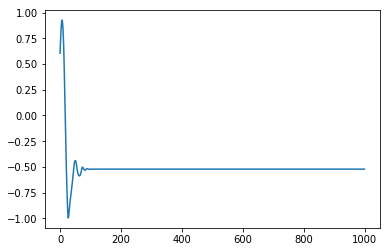

In [28]:
arr = arr.reshape((arr.shape[1],))
plt.plot(arr[:1000])
plt.show()

In [29]:
itr = generate(1, sine_out=False) # try to predict triangle wave
s=next(itr)[0]
s=s[:,:5,:]
print(s)
y = model.predict(s)
print(y)

[[[0.57441538]
  [0.63807736]
  [0.70173933]
  [0.76540131]
  [0.82906329]]]
[[0.8807094]]


In [30]:
np.hstack((s,y.reshape(1,1,1)))
arr = s
for i in range(1001):
    tmp = model.predict(arr[:,-5:,:])
    arr = np.hstack((arr,tmp.reshape(1,1,1)))
    if i%1000==0:
        print(i)

0
1000


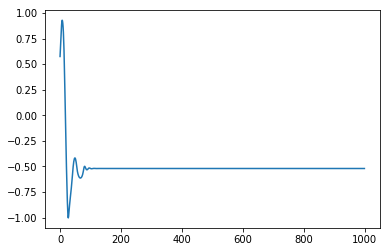

In [31]:
arr = arr.reshape((arr.shape[1],))
plt.plot(arr[:1000])
plt.show()